In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

ritvik1909_marmot_dataset_path = kagglehub.dataset_download('ritvik1909/marmot-dataset')
allanyiinai_trident_path = kagglehub.dataset_download('allanyiinai/trident')
allanyiinai_publaynet_path = kagglehub.dataset_download('allanyiinai/publaynet')
tanmaynathheisair1_one_test_png_path = kagglehub.dataset_download('tanmaynathheisair1/one-test-png')
tanmaynathheisair1_test_dataset_scanned_ie643_path = kagglehub.dataset_download('tanmaynathheisair1/test-dataset-scanned-ie643')
tanmaynathheisair1_training_1_path = kagglehub.dataset_download('tanmaynathheisair1/training-1')
tanmaynathheisair1_rbfnet_pytorch_default_1_path = kagglehub.model_download('tanmaynathheisair1/rbfnet/PyTorch/default/1')

print('Data source import complete.')


In [ ]:
# importing prerequisites
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!pip uninstall tridentx -y
!pip install /kaggle/input/trident/tridentx-0.7.8-py3-none-any.whl



Processing /kaggle/input/trident/tridentx-0.7.8-py3-none-any.whl


In [ ]:
!pip uninstall jax -y

Found existing installation: jax 0.4.26
Uninstalling jax-0.4.26:
  Successfully uninstalled jax-0.4.26


In [ ]:
import os
os.environ['TRIDENT_BACKEND']='pytorch'
from trident import *
import glob


trident 0.7.8


Using Pytorch backend.
Image Data Format: channels_first.
Image Channel Order: rgb.
Pytorch version:2.4.0.
Automatic Mixed Precision Support:True.


Opencv version:4.10.0.
Pillow version:10.4.0.


In [ ]:
# Define color code
colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

## Drawing segmentation polygons for each object.
## Outlining each object with a bounding box.
## Adding labels with the category name near the bounding box.

In [ ]:
# Function to viz the annotation
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        # Draw segmentation
        draw.polygon(annotation['segmentation'][0],
                     fill=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (64,))
        # Draw bbox
        draw.rectangle(
            (annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            width=2
        )
        print([annotation['bbox'][0],annotation['bbox'][1],
               annotation['bbox'][0] + annotation['bbox'][2],
               annotation['bbox'][1] + annotation['bbox'][3],
               samples['categories'][annotation['category_id'] - 1]['name']],flush=True)
        # Draw label
        w, h = draw.textsize(text=samples['categories'][annotation['category_id'] - 1]['name'],
                             font=font)
        if annotation['bbox'][3] < h:
            draw.rectangle(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + annotation['bbox'][2] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
        else:
            draw.rectangle(
                (annotation['bbox'][0],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
    return np.array(image)

In [ ]:
pic_images=glob.glob('/kaggle/input/training-1/*.jpg')
print(len(pic_images))



# Parse the JSON file and read all the images and labels
with open('/kaggle/input/training-1/_annotations.coco.json', 'r') as fp:
    samples = json.load(fp)
print(len(samples))
# Index images


print(len(samples['images']))
print(len(samples['annotations']))


118
5
118
245


In [ ]:
pathdict={split_path(p)[1]+'.jpg':p  for p in pic_images}
print(len(pathdict))
print(list(pathdict.items())[:3])

118
[('d4c8a563-6cc8-44f5-a678-d34fadbd000d_jpg.rf.f2882d5227571b7a0a1c1e071fbc8502.jpg', '/kaggle/input/training-1/d4c8a563-6cc8-44f5-a678-d34fadbd000d_jpg.rf.f2882d5227571b7a0a1c1e071fbc8502.jpg'), ('2aad4db6-1291-48f6-9099-886e79797b46_jpg.rf.1cb0852e767ff07f3cf1794564b9b26c.jpg', '/kaggle/input/training-1/2aad4db6-1291-48f6-9099-886e79797b46_jpg.rf.1cb0852e767ff07f3cf1794564b9b26c.jpg'), ('38a3030c-97fc-46de-a386-18140f882b44_jpg.rf.72f0274399a456aceb1f703146987acc.jpg', '/kaggle/input/training-1/38a3030c-97fc-46de-a386-18140f882b44_jpg.rf.72f0274399a456aceb1f703146987acc.jpg')]


In [ ]:
print(len(samples['categories']))




4


In [ ]:
print(len(samples['images']))
print(len(samples['annotations']))
print(samples['images'][:3])
print('')
print(samples['annotations'][:3])

118
245
[{'id': 0, 'license': 1, 'file_name': 'd4c8a563-6cc8-44f5-a678-d34fadbd000d_jpg.rf.001402afc12d25696bb5f6735d2cfdba.jpg', 'height': 640, 'width': 640, 'date_captured': '2024-10-24T19:10:06+00:00'}, {'id': 1, 'license': 1, 'file_name': 'ff1bf901-38c3-41cf-9ae9-e8c37a72ae9a_jpg.rf.0ae6fe15a17ea4aca35e004e8e4b521f.jpg', 'height': 640, 'width': 640, 'date_captured': '2024-10-24T19:10:06+00:00'}, {'id': 2, 'license': 1, 'file_name': '3e5eb493-17ac-42e5-9a9a-76399cc18db6_jpg.rf.0e07ea7dca8856feaa6e31a2b41a22bb.jpg', 'height': 640, 'width': 640, 'date_captured': '2024-10-24T19:10:06+00:00'}]

[{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [335, 210, 290, 101], 'area': 29290, 'segmentation': [], 'iscrowd': 0}, {'id': 1, 'image_id': 0, 'category_id': 2, 'bbox': [311, 392, 273, 111], 'area': 30303, 'segmentation': [], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 3, 'bbox': [31, 257, 293, 120], 'area': 35160, 'segmentation': [], 'iscrowd': 0}]


In [ ]:
pdfimages = {}

for image in tqdm(samples['images']):
    if image['file_name']in pathdict:
        pdfimages[image['id']] =  {'file_name':pathdict[image['file_name']],'height':image['height'],'width':image['width'], 'annotations': []}
for ann in tqdm(samples['annotations']):
    if ann['image_id'] in pdfimages and 'annotations' in pdfimages[ann['image_id']]:
        pdfimages[ann['image_id']]['annotations'].append(ann)

print(len(pdfimages))

100%|██████████| 245/245 [00:00<00:00, 451099.42it/s]

118


In [ ]:
# print(len(pdfimages))
# pdfimages={k:v for k,v in tqdm(pdfimages.items()) if os.path.exists(v['file_name'])}
# print(len(pdfimages))

In [ ]:
font = ImageFont.truetype("DejaVuSans", 15)

In [ ]:

def intersect(box_a, box_b):
    """ We Resize both tensors to [A,B,2] without new malloc:
    [A,2] -> [A,1,2] -> [A,B,2]
    [B,2] -> [1,B,2] -> [A,B,2]
    Then we compute the area of intersect between box_a and box_b.
    Args:
      box_a: (tensor) bounding boxes, Shape: [A,4].
      box_b: (tensor) bounding boxes, Shape: [B,4].
    Return:
      (tensor) intersection area, Shape: [A,B].
    """
    A = box_a.size(0)
    B = box_b.size(0)
    max_xy = torch.min(box_a[:, 2:4].unsqueeze(1).expand(A, B, 2), box_b[:, 2:4].unsqueeze(0).expand(A, B, 2))
    min_xy = torch.max(box_a[:, 0:2].unsqueeze(1).expand(A, B, 2), box_b[:, 0:2].unsqueeze(0).expand(A, B, 2))
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]


def jaccard(box_a, box_b):
    """Compute the jaccard overlap of two sets of boxes.  The jaccard overlap
    is simply the intersection over union of two boxes.  Here we operate on
    ground truth boxes and default boxes.
    E.g.:
        A ∩ B / A ∪ B = A ∩ B / (area(A) + area(B) - A ∩ B)
    Args:
        box_a: (tensor) Ground truth bounding boxes, Shape: [num_objects,4]
        box_b: (tensor) Prior boxes from priorbox layers, Shape: [num_priors,4]
    Return:
        jaccard overlap: (tensor) Shape: [box_a.size(0), box_b.size(0)]
    """
    inter = intersect(box_a, box_b)
    area_a = ((box_a[:, 2] - box_a[:, 0]) * (box_a[:, 3] - box_a[:, 1])).unsqueeze(1).expand_as(inter)  # [A,B]
    area_b = ((box_b[:, 2] - box_b[:, 0]) * (box_b[:, 3] - box_b[:, 1])).unsqueeze(0).expand_as(inter)  # [A,B]
    union = area_a + area_b - inter
    return inter, union  # [A,B]


def match(truths, priors, variances, labels, keypoints=None, threshold=0.3):
    """Match each prior box with the ground truth box of the highest jaccard
    overlap, encode the bounding boxes, then return the matched indices
    corresponding to both confidence and location preds.
    Args:

        truths: (tensor) Ground truth boxes, Shape: [num_obj, num_priors].
        priors: (tensor) Prior boxes from priorbox layers, Shape: [n_priors,4].
        variances: (tensor) Variances corresponding to each prior coord,
            Shape: [num_priors, 4].
        labels: (tensor) All the class labels for the image, Shape: [num_obj].
        loc_t: (tensor) Tensor to be filled w/ endcoded location targets.
        conf_t: (tensor) Tensor to be filled w/ matched indices for conf preds.
        idx: (int) current batch index
        threshold: (float) The overlap threshold used when mathing boxes.

    Return:
        The matched indices corresponding to 1)location and 2)confidence preds.
    """
    # jaccard index
    priors2 = priors.clone()
    num_priors = len(priors)
    overlaps = jaccard(truths, xywh2xyxy(priors.clone()))
    # (Bipartite Matching)
    # [1,num_objects] best prior for each ground truth
    best_prior_overlap, best_prior_idx = overlaps.max(1, keepdim=True)

    # ignore hard gt
    valid_gt_idx = best_prior_overlap[:, 0] >= 0.2
    best_prior_idx_filter = best_prior_idx[valid_gt_idx, :]
    if best_prior_idx_filter.shape[0] <= 0:
        return np.zeros((num_priors, 4)).astype(np.float32), np.zeros((num_priors, 1)).astype(np.int64), np.zeros(
            (num_priors, 16)).astype(np.float32)

    # [1,num_priors] best ground truth for each prior
    best_truth_overlap, best_truth_idx = overlaps.max(0, keepdim=True)
    best_truth_idx.squeeze_(0)
    best_truth_overlap.squeeze_(0)
    best_prior_idx.squeeze_(1)
    best_prior_idx_filter.squeeze_(1)
    best_prior_overlap.squeeze_(1)
    best_truth_overlap.index_fill_(0, best_prior_idx_filter, 2)  # ensure best prior
    # TODO refactor: index  best_prior_idx with long tensor
    # ensure every gt matches with its prior of max overlap
    for j in range(best_prior_idx.size(0)):
        best_truth_idx[best_prior_idx[j]] = j
    matches = truths[best_truth_idx]  # Shape: [num_priors,14]
    conf = labels[best_truth_idx]  # Shape: [num_priors]
    keypoints = keypoints[best_truth_idx]
    conf[best_truth_overlap < threshold] = 0  # label as background

    loc = encode(matches, priors2, variances)
    return loc, conf, keypoints


def encode(matched, priors, variances):
    """

    Args:
        matched (tensor): Coords of ground truth for each prior in xyxy Shape: [num_priors, 4].
        priors (tensor): Prior boxes in center-offset form Shape: [num_priors,4].
        variances (list[float]):  Variances of priorboxes

    Returns:
        encoded boxes and landmarks (tensor), Shape: [num_priors, 14]

    """

    # dist b/t match center and prior's center
    priors = priors.clone()
    g_cxcy = (matched[:, 0:2] + matched[:, 2:4]) / 2 - priors[:, 0:2]
    # encode variance
    g_cxcy /= (variances[0] * priors[:, 2:4])
    # match wh / prior wh
    g_wh = (matched[:, 2:4] - matched[:, 0:2]) / priors[:, 2:4]
    g_wh = torch.log(g_wh) / variances[1]

    # # landmarks
    # g_xy1 = (matched[:, 4:6] - priors[:, 0:2]) / (variances[0] * priors[:, 2:4])
    # g_xy2 = (matched[:, 6:8] - priors[:, 0:2]) / (variances[0] * priors[:, 2:4])
    # g_xy3 = (matched[:, 8:10] - priors[:, 0:2]) / (variances[0] * priors[:, 2:4])
    # g_xy4 = (matched[:, 10:12] - priors[:, 0:2]) / (variances[0] * priors[:, 2:4])
    # g_xy5 = (matched[:, 12:14] - priors[:, 0:2]) / (variances[0] * priors[:, 2:4])

    # return target for loss
    return torch.cat([g_cxcy, g_wh], 1)  # [num_priors,14]


def decode(loc, priors, variances):
    """Decode locations from predictions using priors to undo
    the encoding we did for offset regression at train time.
    Adapted from https://github.com/Hakuyume/chainer-ssd

    Args:
        loc (tensor): location predictions for loc layers,
            Shape: [num_priors,4]
        priors (tensor): Prior boxes in center-offset form.
            Shape: [num_priors,4].
        variances: (list[float]) Variances of priorboxes

    Return:
        decoded bounding box predictions

    """
    boxes = torch.cat([priors.unsqueeze(0)[:, :, 0:2] + loc[:, :, 0:2] * variances[0] * priors.unsqueeze(0)[:, :, 2:4],
                       priors.unsqueeze(0)[:, :, 2:4] * torch.exp(loc[:, :, 2:4] * variances[1])], -1)
    boxes[:, :, 0:2] -= boxes[:, :, 2:4] / 2
    boxes[:, :, 2:4] += boxes[:, :, 0:2]
    return boxes


np.set_printoptions(precision=3)


def point_in_box(point, box):
    if ndim(box) + 1 == ndim(point):
        box = np.expand_dims(box, 1)
    if ndim(point) == ndim(box) == 1:
        x, y = point
        x1, y1, x2, y2 = box
        if x1 < x < x2 and y1 < y < y2:
            return True
        else:
            return False
    elif ndim(point) == ndim(box) == 2:
        x = point[:, 0]
        y = point[:, 1]
        x1 = box[:, 0]
        y1 = box[:, 1]
        x2 = box[:, 2]
        y2 = box[:, 3]
        return np.greater_equal(x, x1) * np.greater_equal(x2, x) * np.greater_equal(y, y1) * np.greater_equal(y2, y)
    elif ndim(point) == ndim(box) == 3:
        x = point[:, :, 0]
        y = point[:, :, 1]
        x1 = box[:, :, 0]
        y1 = box[:, :, 1]
        x2 = box[:, :, 2]
        y2 = box[:, :, 3]
        return np.greater_equal(x, x1) * np.greater_equal(x2, x) * np.greater_equal(y, y1) * np.greater_equal(y2, y)


class SsdBboxDataset(BboxDataset):
    def __init__(self, boxes=None, image_size=(480, 640), priors=None, center_variance=0.1, size_variance=0.2,
                 gt_overlap_tolerance=0.35, object_type=ObjectType.absolute_bbox, class_names=None,
                 symbol='bbox', name=''):
        super().__init__(boxes=boxes, image_size=image_size, object_type=object_type, class_names=class_names,
                         symbol=symbol, name=name)
        self._element_spec = TensorSpec(shape=TensorShape([None, 5]), name=self.symbol, object_type=self.object_type,
                                        is_spatial=True)
        self.priors = priors
        self.image_size = image_size
        self.center_variance = center_variance
        self.size_variance = size_variance
        self.label_transform_funcs = []
        self.gt_overlap_tolerance = gt_overlap_tolerance
        self.bbox_post_transform_funcs = []

    def __getitem__(self, index: int):


        if self.items[index] is None or len(self.items[index]) == 0 or self.items[index].shape[-1]==0:
            return np.expand_dims(np.ones((5)) * -1, 0)
        else:
            return self.items[index].astype(np.float32)

    def area_of(self, left_top, right_bottom):
        """Compute the areas of rectangles given two corners.

        Args:
            left_top (N, 2): left top corner.
            right_bottom (N, 2): right bottom corner.

        Returns:
            area (N): return the area.
        """
        hw = np.clip(right_bottom - left_top, 0.0, None)
        return hw[..., 0] * hw[..., 1]

    def iou_of(self, boxes0, boxes1, eps=1e-5):
        """Return intersection-over-union (Jaccard index) of boxes.

        Args:
            boxes0 (N, 4): ground truth boxes.
            boxes1 (N or 1, 4): predicted boxes.
            eps: a small number to avoid 0 as denominator.
        Returns:
            iou (N): IoU values.
        """
        overlap_left_top = np.maximum(boxes0[..., :2], boxes1[..., :2])
        overlap_right_bottom = np.minimum(boxes0[..., 2:4], boxes1[..., 2:4])

        overlap_area = self.area_of(overlap_left_top, overlap_right_bottom)
        area0 = self.area_of(boxes0[..., :2], boxes0[..., 2:4])
        area1 = self.area_of(boxes1[..., :2], boxes1[..., 2:4])
        return overlap_area / (area0 + area1 - overlap_area + eps)

    def convert_boxes_to_locations(self, center_form_boxes, center_form_priors):
        if len(center_form_priors.shape) + 1 == len(center_form_boxes.shape):
            center_form_priors = np.expand_dims(center_form_priors, 0)
        return np.concatenate([(center_form_boxes[..., :2] - center_form_priors[..., :2]) / center_form_priors[...,
                                                                                            2:] / self.center_variance,
                               np.log(np.clip(center_form_boxes[..., 2:] / center_form_priors[..., 2:], 1e-8,
                                              np.inf)) / self.size_variance],
                              axis=len(center_form_boxes.shape) - 1)

    def center_form_to_corner_form(self, locations):
        return torch.cat([locations[..., :2] - locations[..., 2:] / 2,
                          locations[..., :2] + locations[..., 2:] / 2], locations.dim() - 1)

    def assign_priors(self, gt_boxes, gt_labels, center_form_priors, iou_threshold):
        # print('gt_boxes',gt_boxes.shape,gt_boxes)
        # print('center_form_priors',center_form_priors.shape,center_form_priors)

        corner_form_priors = xywh2xyxy(center_form_priors)
        # print('corner_form_priors',corner_form_priors.shape,corner_form_priors)
        ious = self.iou_of(np.expand_dims(gt_boxes, 0), np.expand_dims(to_numpy(corner_form_priors), 1))

        # size: num_priors
        # best_target_per_prior0, best_target_per_prior_index0 = to_tensor(ious).max(1)
        # # size: num_targets
        # best_prior_per_target0, best_prior_per_target_index0 = to_tensor(ious).max(0)
        # best_target_per_prior_index0=to_numpy(best_target_per_prior_index0)
        # best_target_per_prior0 = to_numpy(best_target_per_prior0)

        best_target_per_prior, best_target_per_prior_index = np.max(ious, axis=1), np.argmax(ious, axis=1)

        # size: num_targets
        best_prior_per_target, best_prior_per_target_index = np.max(ious, axis=0), np.argmax(ious, axis=0)

        for target_index, prior_index in enumerate(best_prior_per_target_index):
            best_target_per_prior_index[prior_index] = target_index
            # overlaps = best_target_per_prior[best_target_per_prior_index == target_index]
            # overlaps.sort()
            # overlaps = overlaps[::-1]
            # threshould = 0.1  # overlaps[1 if len(overlaps) > 2 else 0]
            # mask1 = ((best_target_per_prior_index == target_index) * ()).astype(
            #     np.bool)
            # best_target_per_prior[best_prior_per_target_index[target_index]] = 2

        # best_target_per_prior_index[mask1] = -1

        # 2.0 is used to make sure every target has a prior assigned
        to_tensor(best_target_per_prior).index_fill_(0, to_tensor(best_prior_per_target_index).long(), 2)
        best_target_per_prior = to_numpy(best_target_per_prior)

        # labels[best_target_per_prior < iou_threshold] = 0  # the backgournd id

        labels = gt_labels[best_target_per_prior_index]
        labels[best_target_per_prior < 0.3] = 0

        boxes = gt_boxes[best_target_per_prior_index]
        # boxes[best_target_per_prior == 0] = 0
        return boxes, labels

    def data_transform(self, data):
        if data is None or len(data) == 0:
            return np.zeros((self.priors.shape[0], 5)).astype(np.float32)
        elif isinstance(data, np.ndarray):
            height, width = self.image_size
            # print('data traznsform data',data.shape,data)
            # print('data',data)

            data[:, 0] = np.clip(data[:, 0], 0, width)
            data[:, 2] = np.clip(data[:, 2], 0, width)
            data[:, 1] = np.clip(data[:, 1], 0, height)
            data[:, 3] = np.clip(data[:, 3], 0, height)

            box_area = (data[:, 2] - data[:, 0]) * (data[:, 3] - data[:, 1])
            area_mask = box_area > 5

            data = data[area_mask, :]
            if len(data) == 0:
                return np.zeros((self.priors.shape[0], 5)).astype(np.float32)

            #             small_box_mask1=np.round(data[:, 0])==np.round(data[:, 2],0)
            #             data[:, 2:3][small_box_mask1,:]+=1
            #             small_box_mask2=np.round(data[:, 1])==np.round(data[:, 3],0)
            #             data[:, 3:4][small_box_mask2,:]+=1

            box_w = np.expand_dims(data[:, 2] - data[:, 0], -1)
            box_h = np.expand_dims(data[:, 3] - data[:, 1], -1)
            box_left = np.expand_dims(data[:, 0].copy(), -1)
            box_top = np.expand_dims(data[:, 1].copy(), -1)
            # print('box_w',box_w.shape)
            # print('box_left',box_left.shape)

            gt_box = data[:, :4]

            gt_label = data[:, 4:5]

            # if gt_label.max()==2:
            #     print('')

            # if len([n for n in gt_label.reshape(-1) if n>1])>0:
            #    print(data)

            gt_box[:, 0] = gt_box[:, 0] / width
            gt_box[:, 2] = gt_box[:, 2] / width
            gt_box[:, 1] = gt_box[:, 1] / height
            gt_box[:, 3] = gt_box[:, 3] / height

            # print('gt_box',gt_box,'gt_label',gt_label)

            if gt_box is not None and len(gt_box) > 0:
                truths = to_tensor(gt_box).float()
                labels = to_tensor(gt_label).long()

                # print('gt_box',gt_box)
                boxes, confidences = self.assign_priors(gt_box, gt_label, self.priors,
                                                        iou_threshold=self.gt_overlap_tolerance)
                # print('boxes',boxes.shape,boxes.sum(),'confidences',confidences.shape,confidences.sum())
                boxes = xyxy2xywh(to_numpy(boxes))

                locations = self.convert_boxes_to_locations(boxes, to_numpy(self.priors))

                locations = np.concatenate(
                    [to_numpy(locations).astype(np.float32), to_numpy(confidences).astype(np.float32)], axis=-1)
                # print(locations.shape)
                # cf=to_tensor(locations[:,4])
                # mask=cf==1
                # print(to_tensor(locations)[mask,:])
                return to_numpy(locations).astype(np.float32)

            num_priors = self.priors.shape[0]
            return np.zeros((num_priors, 5)).astype(np.float32)

    def bbox_transform(self, bbox):
        return self.data_transform(bbox)



In [ ]:
imgs=[]
bboxes=[]

for k,image in tqdm(pdfimages.items()):
    try:
        h=int(image['height'])
        w=int(image['width'])
#         h0=h
#         w0=w
#         if w<=h*(640.0/480.0):
#             w0=float(h*(640.0/480.0))
#         else:
#             h0=float(w*(480.0/640.0))

        annotations=image['annotations']
        this_bboxes=[]
        annotate_ratio=0
        for annotation in annotations:
            this_bboxes.append([
            annotation['bbox'][0],
            annotation['bbox'][1],
            (annotation['bbox'][0] + annotation['bbox'][2]),
            (annotation['bbox'][1] + annotation['bbox'][3]),
            annotation['category_id']])
            annotate_ratio+=annotation['bbox'][2]* annotation['bbox'][3]
        if annotate_ratio/float(h*w)>0.5:
            bboxes.append(np.array(this_bboxes))
            imgs.append(image['file_name'])
    except Exception as e:
        print(e)


print(len(imgs))
print(len(bboxes))
print(imgs[:3])
print(bboxes[:3])

100%|██████████| 118/118 [00:00<00:00, 96892.69it/s]

25
25
['/kaggle/input/training-1/d4c8a563-6cc8-44f5-a678-d34fadbd000d_jpg.rf.001402afc12d25696bb5f6735d2cfdba.jpg', '/kaggle/input/training-1/7a804fa1-8f06-4154-9426-b219f8bf97e4_jpg.rf.0f8721cfc2a4a58d0456b15954940085.jpg', '/kaggle/input/training-1/db9698e3-7d14-4c10-b998-fca15ece7926_jpg.rf.042b3ddeeefc007b9f4648b83e0e8d27.jpg']
[array([[335, 210, 625, 311,   2],
       [311, 392, 584, 503,   2],
       [ 31, 257, 324, 377,   3],
       [323, 287, 620, 412,   3],
       [ 23, 163, 334, 285,   3],
       [ 14, 345, 309, 470,   3]]), array([[ 91, 243, 553, 453,   1],
       [ 37, 392, 551, 537,   3],
       [ 70, 156, 584, 306,   3]]), array([[ 48, 203, 541, 580,   2],
       [156, 131, 497, 263,   3]])]


In [ ]:

from trident.models import rfbnet
new_rfbmodel = rfbnet.RfbNet(pretrianed=True, num_classes=6, num_regressors=4, detection_threshold=0.5)
new_rfbmodel.model.softmax.add_noise = True
new_rfbmodel.model.softmax.noise_intensity = 0.08
# new_rfbmodel.model.softmax.temperature = 1.2
new_rfbmodel.model.backbond1[5][1].dropout_rate=0.2
new_rfbmodel.model.backbond2[1][1].dropout_rate=0.2
new_rfbmodel.model.backbond3[0][1].dropout_rate=0.2
print(' new_rfbmodel.detection_threshold:', new_rfbmodel.detection_threshold)

new_rfbmodel.load_model('/kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth')

new_rfbmodel.model.trainable =True
# for name, module in new_rfbmodel.model.named_modules():
#     if 'classification_headers' in name or 'regression_headers' in name:
#         module.trainable=True
new_rfbmodel.train()
new_rfbmodel.summary()


priors nums:17640
 new_rfbmodel.detection_threshold: 0.5
Loading pretrained model from /kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth
Missing keys:0

Unused checkpoint keys:0

Used keys:209
Model loaded!
--------------------------------------------------------------------------------------------------------------------------------
                     Layer (type)                       Output Shape               Weight                          Bias      Param #   FLOPS #                  
backbond1.0.conv  [Conv2d]                              (1, 16, 240, 320)          'weight', [16, 3, 3, 3]                   432  66,278,400  
backbond1.0.norm  [BatchNorm]                           (1, 16, 240, 320)          'weight', [16]                  'bias', [16]  32  4,761,600  
backbond1.0.activation  [Relu]                          (1, 16, 240, 320)                                                    0  0  
backbond1.0  [Conv2d_Block]                             (1, 16, 240, 

SsdDetectionModel(
  (palette): (0, 0, 0)
  (palette): (128, 255, 128)
)

In [ ]:
ds1 = ImageDataset(imgs, symbol='images')
ds2 = SsdBboxDataset(bboxes, priors=new_rfbmodel.model.priors, symbol='boxes')
ds_11 = ImageDataset(imgs, symbol='images1')
ds_12 =ImageDataset(imgs,object_type=ObjectType.image_path, symbol='image_path')
data_provider = DataProvider(traindata=Iterator(data=ds1, label=ZipDataset(ds2,ds_11,ds_12)))

data_provider.paired_transform_funcs = [
    OneOf([
        Resize((640, 720), True, True),
        RandomCenterCrop((480, 640),scale_range=(0.9,1.1))]),
    Resize((480, 640), True, True)]

data_provider.image_transform_funcs = [
    RandomAdjustGamma(gamma_range=(0.5, 1.5)),
    RandomAdjustHue(value_range=(-0.3, 0.3)),
    RandomAdjustContrast(value_range=(0.6, 1.4)),
    RandomAdjustSaturation(value_range=(0.6, 1.4)),
    SaltPepperNoise(prob=0.002),
    Normalize(127.5, 127.5)]

images


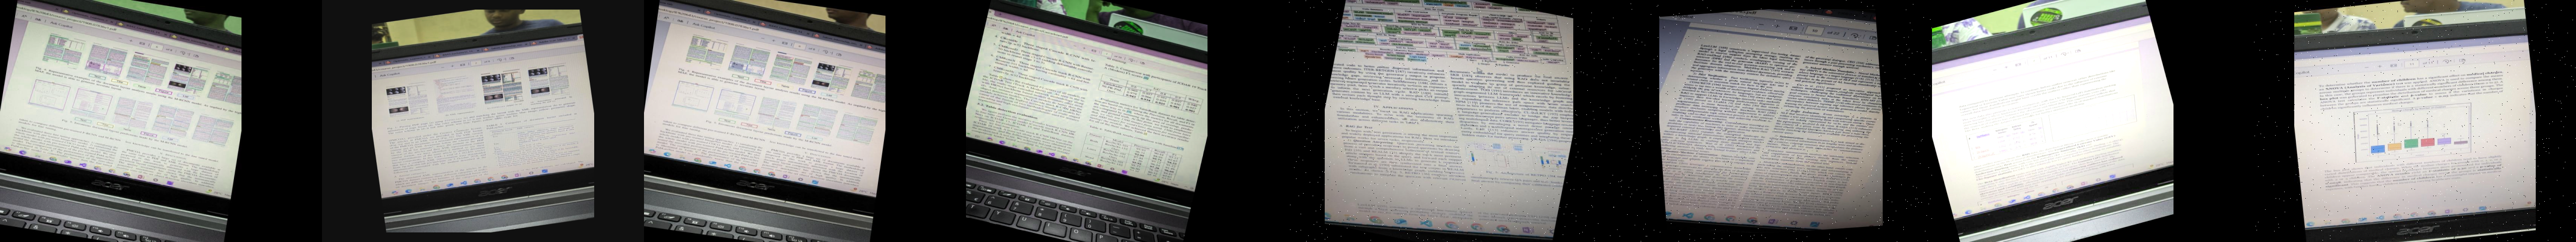

images1


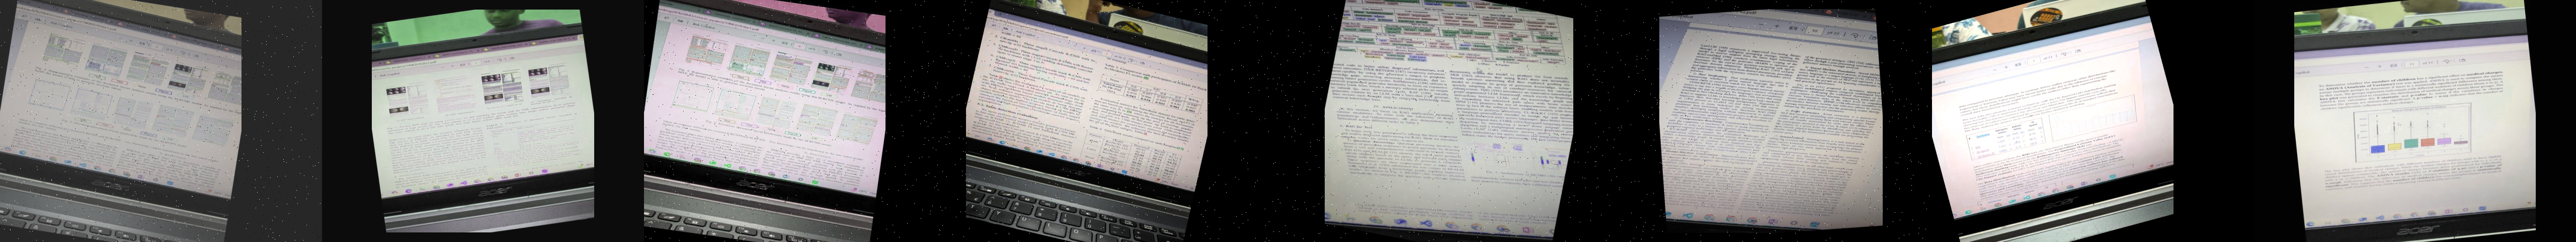

In [ ]:
data_provider.preview_images()

In [ ]:

import torch
import torch.nn.functional as F


def preprocess_data(training_context):
    traindata = training_context['train_data']
    boxes = traindata['boxes']

    traindata['target_confidences'] = boxes[:, :, -1].long().detach()
    # print('traindata[target_confidences]',traindata['target_confidences'].shape)
    traindata['target_locations'] = boxes[:, :, :-1].detach()


def hard_negative_mining(loss, labels, neg_pos_ratio):
    """
    It used to suppress the presence of a large number of negative prediction.
    It works on image level not batch level.
    For any example/image, it keeps all the positive predictions and
     cut the number of negative predictions to make sure the ratio
     between the negative examples and positive examples is no more
     the given ratio for an image.

    Args:
        loss (N, num_priors): the loss for each example.
        labels (N, num_priors): the labels.
        neg_pos_ratio:  the ratio between the negative examples and positive examples.
    """
    pos_mask = labels > 0
    num_pos = pos_mask.long().sum(dim=1, keepdim=True)
    num_neg = num_pos * neg_pos_ratio

    loss[pos_mask] = -math.inf
    _, indexes = loss.sort(dim=1, descending=True)
    _, orders = indexes.sort(dim=1)
    neg_mask = orders < num_neg
    return pos_mask | neg_mask


import torchvision


def _softmax_focal_loss(confidences, target_confidences):
    gamma = 2.8
    logp = torch.gather(confidences, -1, target_confidences.long().unsqueeze(-1))
    focalloss = - (1 - logp.exp()).pow(gamma) * logp
    return focalloss.sum()


class MultiboxLoss(nn.Module):
    def __init__(self, priors, neg_pos_ratio=3.5, center_variance=0.1, size_variance=0.2):
        """Implement SSD Multibox Loss.
        Basically, Multibox loss combines classification loss
         and Smooth L1 regression loss.
        """
        super(MultiboxLoss, self).__init__()
        self.neg_pos_ratio = neg_pos_ratio
        self.center_variance = center_variance
        self.size_variance = size_variance
        self.priors = priors
        self.priors.to(get_device())

    def forward(self, confidences, locations, target_confidences, target_locations):
        """Compute classification loss and smooth l1 loss.
        Args:
            confidences (batch_size, num_priors, num_classes): class predictions.
            locations (batch_size, num_priors, 4): predicted locations.
            target_confidences (batch_size, num_priors): real labels of all the priors.
            target_locations (batch_size, num_priors, 4): real boxes corresponding all the priors.
        """
        num_classes = confidences.size(2)
        # target_confidences=target_confidences.reshape(-1)

        with torch.no_grad():
            # derived from cross_entropy=sum(log(p))
            loss = -confidences[:, :, 0]
            # loss = -F.log_softmax(confidence, dim=2)[:, :, 0]
            mask = hard_negative_mining(loss, target_confidences, self.neg_pos_ratio)
        classification_loss = nn.functional.nll_loss(confidences[mask, :].reshape(-1, num_classes),
                                                     target_confidences[mask].long(), reduction='mean')

        classification_loss = classification_loss + _softmax_focal_loss(confidences[mask, :], target_confidences[mask])
        # plate_mask = ((target_confidences == 1).float() + (exp(confidences)[..., 1] < 0.7).float()) == 2
        # human_mask = ((target_confidences == 2).float() + (exp(confidences)[..., 2] < 0.7).float()) == 2
        # falsepositive_mask = ((target_confidences == 0).float() + (
        #         exp(confidences)[..., 1:].reduce_max(-1) >= 0.5).float()) == 2

        # classification_loss = F.cross_entropy(exp(confidences)[mask, :].reshape(-1, num_classes),
        #                                       target_confidences[mask], reduction='sum')
        # classification_loss = classification_loss + 2 * F.cross_entropy(
        #     exp(confidences)[plate_mask, :].reshape(-1, num_classes), target_confidences[plate_mask], reduction='sum')
        # classification_loss = classification_loss + 4 * F.cross_entropy(
        #     exp(confidences)[human_mask, :].reshape(-1, num_classes), target_confidences[human_mask], reduction='sum')
        # classification_loss = classification_loss + 1.5 * F.cross_entropy(
        #     exp(confidences)[falsepositive_mask, :].reshape(-1, num_classes), target_confidences[falsepositive_mask],
        #     reduction='sum')

        # classification_loss=classification_loss+torchvision.ops.sigmoid_focal_loss(confidences.reshape(-1, num_classes), make_onehot(target_confidences[mask],num_classes,1).reshape(-1, num_classes), reduction='sum')

        pos_mask = target_confidences > 0
        locations = locations[pos_mask, :].reshape(-1, 4)
        target_locations = target_locations[pos_mask, :].reshape(-1, 4)
        smooth_l1_loss = F.smooth_l1_loss(locations, target_locations.detach(), reduction='sum')  # smooth_l1_loss
        smooth_l1_loss =smooth_l1_loss+ F.mse_loss(locations, target_locations.detach(), reduction='sum')  #l2 loss

        # target_confidences_onehot = make_onehot(target_confidences, num_classes, -1).detach()
        # diff = (exp(confidences)[pos_mask, :].reshape(-1, num_classes) - target_confidences_onehot[pos_mask, :].reshape(
        #     -1, num_classes))
        # diff = (diff * 2) ** 2
        #
        # diff1 = (exp(confidences)[~pos_mask, :].reshape(-1, num_classes) - target_confidences_onehot[~pos_mask,
        #                                                                    :].reshape(-1, num_classes))
        # diff1 = (diff1 * 2) ** 2
        num_pos = target_locations.size(0)
        return 2 * (smooth_l1_loss / num_pos) + (
                classification_loss.sum() / len(confidences))  # + diff.mean() + 2 * diff1.mean()


#
# # with slight modifications
# def _box_inter_union(boxes1: Tensor, boxes2: Tensor) -> Tuple[Tensor, Tensor]:
#     area1 = box_area(boxes1)
#     area2 = box_area(boxes2)
#
#     lt = torch.max(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
#     rb = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])  # [N,M,2]
#
#     wh = _upcast(rb - lt).clamp(min=0)  # [N,M,2]
#     inter = wh[:, :, 0] * wh[:, :, 1]  # [N,M]
#
#     union = area1[:, None] + area2 - inter
#
#     return inter, union


def diou_loss(confidences, locations, target_confidences, target_locations, alpha=3):
    eps = 1e-7
    reduction = 'mean'
    pred_boxes = locations[:, :, :4]
    pred_boxes = decode(pred_boxes, new_rfbmodel.model.priors.detach(), (0.1, 0.2)) * to_tensor([[640, 480, 640, 480]])
    pred_boxes = pred_boxes.reshape((-1, 4))
    confidences = confidences.reshape(-1, confidences.size(-1)).requires_grad_()

    target_boxes = target_locations[:, :, :4]
    target_boxes = decode(target_boxes, new_rfbmodel.model.priors.detach(), (0.1, 0.2)) * to_tensor(
        [[640, 480, 640, 480]])
    target_boxes = target_boxes.reshape((-1, 4)).detach()
    target_confidences = target_confidences.reshape(-1)
    loss = to_tensor(0)
    for class_index in range(1, confidences.shape[1]):
        probs = exp(confidences)[..., class_index]
        mask1 = probs >= 0.4
        boxes1 = pred_boxes[mask1, :].requires_grad_()

        mask2 = target_confidences == class_index
        this_target_boxes = round(target_boxes[mask2, :], 0)
        if len(this_target_boxes) == 0:
            if len(boxes1) > 0:
                loss = loss + 1
            continue
        if len(boxes1) == 0:
            loss = loss + 1
            continue
        boxes2 = this_target_boxes.unique(dim=0).detach()

        area1 = box_area(boxes1)
        area2 = box_area(boxes2)

        lt = torch.max(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
        rb = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])  # [N,M,2]

        wh = (rb - lt).clamp(min=0)  # [N,M,2]
        inter = wh[:, :, 0] * wh[:, :, 1]  # [N,M]

        union = area1[:, None] + area2 - inter

        # IoU
        ious = pow(inter / union, alpha)

        beta = 2 * alpha

        # enclose area
        enclose_x1y1 = torch.min(boxes1[:, None, :2], boxes2[:, :2])
        enclose_x2y2 = torch.max(boxes1[:, None, 2:], boxes2[:, 2:])
        enclose_wh = (enclose_x2y2 - enclose_x1y1).clamp(min=0)

        cw = enclose_wh[:, :, 0]
        ch = enclose_wh[:, :, 1]

        c2 = cw ** beta + ch ** beta + eps

        b1_x1, b1_y1 = boxes1[:, None, 0], boxes1[:, None, 1]
        b1_x2, b1_y2 = boxes1[:, None, 2], boxes1[:, None, 3]
        b2_x1, b2_y1 = boxes2[:, 0], boxes2[:, 1]
        b2_x2, b2_y2 = boxes2[:, 2], boxes2[:, 3]

        left = ((b2_x1 + b2_x2) - (b1_x1 + b1_x2)) ** 2 / 4
        right = ((b2_y1 + b2_y2) - (b1_y1 + b1_y2)) ** 2 / 4
        rho2 = left + right

        # # DIoU
        # dious = ious - rho2 / c2
        # loss = 1 - dious
        # return loss.mean()

        rho_w2 = ((b2_x2 - b2_x1) - (b1_x2 - b1_x1)) ** beta
        rho_h2 = ((b2_y2 - b2_y1) - (b1_y2 - b1_y1)) ** beta
        cw2 = cw ** beta + eps
        ch2 = ch ** beta + eps
        _eiou = ious - (rho2 / c2 + rho_w2 / cw2 + rho_h2 / ch2)

        loss = loss + (1 - _eiou).mean()
    return loss


def eiou_loss(confidences, locations, target_confidences, target_locations):
    eps = 1e-7
    reduction = 'mean'
    boxes1 = locations[:, :, :4]
    boxes1 = decode(boxes1, new_rfbmodel.model.priors.detach(), (0.1, 0.2)) * to_tensor([[640, 480, 640, 480]])
    boxes1 = boxes1.reshape((-1, 4))
    confidences = confidences.reshape(-1, confidences.size(-1)).requires_grad_()
    mask1 = exp(confidences)[..., 1:].reduce_max(-1) >= new_rfbmodel.detection_threshold

    boxes2 = target_locations[:, :, :4]
    boxes2 = decode(boxes2, new_rfbmodel.model.priors.detach(), (0.1, 0.2)) * to_tensor([[640, 480, 640, 480]])
    boxes2 = boxes2.reshape((-1, 4)).detach()
    target_confidences = target_confidences.reshape(-1)
    mask2 = target_confidences > 0

    mask = (mask1.float() + mask2.float()) > 0

    target = boxes2[mask, :]
    dedup_target0 = target.unique(dim=0)
    dedup_target1 = target.unique(dim=1)

    pred = boxes1[mask, :]
    if len(pred) > 0 and len(target) > 0:
        lt = torch.max(pred[:, :2], target[:, :2])
        rb = torch.min(pred[:, 2:], target[:, 2:])
        wh = (rb - lt).clamp(min=0)
        overlap = wh[:, 0] * wh[:, 1]

        # union
        ap = (pred[:, 2] - pred[:, 0]) * (pred[:, 3] - pred[:, 1])
        ag = (target[:, 2] - target[:, 0]) * (target[:, 3] - target[:, 1])
        union = ap + ag - overlap + eps

        # IoU
        ious = overlap / union

        # enclose area
        enclose_x1y1 = torch.min(pred[:, :2], target[:, :2])
        enclose_x2y2 = torch.max(pred[:, 2:], target[:, 2:])
        enclose_wh = (enclose_x2y2 - enclose_x1y1).clamp(min=0)

        cw = enclose_wh[:, 0]
        ch = enclose_wh[:, 1]

        c2 = cw ** 2 + ch ** 2 + eps

        b1_x1, b1_y1 = pred[:, 0], pred[:, 1]
        b1_x2, b1_y2 = pred[:, 2], pred[:, 3]
        b2_x1, b2_y1 = target[:, 0], target[:, 1]
        b2_x2, b2_y2 = target[:, 2], target[:, 3]

        left = ((b2_x1 + b2_x2) - (b1_x1 + b1_x2)) ** 2 / 4
        right = ((b2_y1 + b2_y2) - (b1_y1 + b1_y2)) ** 2 / 4
        rho2 = left + right

        # DIoU
        dious = ious - rho2 / c2
        loss = 1 - dious
        return loss.mean()

    else:
        return 0


def area_of(left_top, right_bottom):
    """Compute the areas of rectangles given two corners.
    Args:
        left_top (N, 2): left top corner.
        right_bottom (N, 2): right bottom corner.
    Returns:
        area (N): return the area.
    """
    hw = np.clip(right_bottom - left_top, 0.0, None)
    return hw[..., 0] * hw[..., 1]


def iou_of(boxes0, boxes1, eps=1e-5):
    """Return intersection-over-union (Jaccard index) of boxes.
    Args:
        boxes0 (N, 4): ground truth boxes.
        boxes1 (N or 1, 4): predicted boxes.
        eps: a small number to avoid 0 as denominator.
    Returns:
        iou (N): IoU values.
    """
    overlap_left_top = np.maximum(boxes0[..., :2], boxes1[..., :2])
    overlap_right_bottom = np.minimum(boxes0[..., 2:], boxes1[..., 2:])

    overlap_area = area_of(overlap_left_top, overlap_right_bottom)
    area0 = area_of(boxes0[..., :2], boxes0[..., 2:])
    area1 = area_of(boxes1[..., :2], boxes1[..., 2:])
    return overlap_area / (area0 + area1 - overlap_area + eps)


def hard_nms(box_scores, iou_threshold, top_k=-1, candidate_size=200):
    """
    Args:
        box_scores (N, 5): boxes in corner-form and probabilities.
        iou_threshold: intersection over union threshold.
        top_k: keep top_k results. If k <= 0, keep all the results.
        candidate_size: only consider the candidates with the highest scores.
    Returns:
         picked: a list of indexes of the kept boxes
    """
    scores = box_scores[:, -1]
    boxes = box_scores[:, :-1]
    picked = []
    # _, indexes = scores.sort(descending=True)
    indexes = np.argsort(scores)
    # indexes = indexes[:candidate_size]
    indexes = indexes[-candidate_size:]
    while len(indexes) > 0:
        # current = indexes[0]
        current = indexes[-1]
        picked.append(current)
        if 0 < top_k == len(picked) or len(indexes) == 1:
            break
        current_box = boxes[current, :]
        # indexes = indexes[1:]
        indexes = indexes[:-1]
        rest_boxes = boxes[indexes, :]
        iou = iou_of(
            rest_boxes,
            np.expand_dims(current_box, axis=0),
        )
        indexes = indexes[iou <= iou_threshold]

    return box_scores[picked, :]


def predict(width, height, confidences, boxes, detection_threshold=0.4, iou_threshold=0.3):
    boxes = boxes[0]
    confidences = confidences[0]
    picked_box_probs = []
    picked_labels = []
    for class_index in range(1, confidences.shape[1]):
        probs = confidences[:, class_index]
        mask = probs > detection_threshold
        probs = probs[mask]
        if probs.shape[0] == 0:
            continue
        subset_boxes = boxes[mask, :]
        box_probs = np.concatenate([subset_boxes, probs.reshape(-1, 1)], axis=1)
        box_probs = hard_nms(box_probs, iou_threshold)
        picked_box_probs.append(box_probs)
        picked_labels.extend([class_index] * box_probs.shape[0])
    if not picked_box_probs:
        return np.array([])
    picked_box_probs = np.concatenate(picked_box_probs)
    picked_box_probs[:, 0] *= width
    picked_box_probs[:, 1] *= height
    picked_box_probs[:, 2] *= width
    picked_box_probs[:, 3] *= height
    return np.concatenate([picked_box_probs[:, :4].astype(np.int32), np.expand_dims(np.array(picked_labels), -1),
                           picked_box_probs[:, 4:5]],
                          axis=1)


from trident.callbacks.lr_schedulers import AdjustLRCallbackBase


class PolyLR(AdjustLRCallbackBase):
    def __init__(self, max_lr=1e-3, max_iter=10000):
        super().__init__()
        self.max_lr = max_lr
        self.max_iter = max_iter

    def on_batch_end(self, training_context):
        current_step = training_context['steps']
        lr = self.max_lr * (1 - (current_step / self.max_iter)) * (1 - (current_step / self.max_iter))
        if (lr < 1.0e-7):
            lr = 1.0e-7
        self.adjust_learning_rate(training_context, lr, verbose=False)


def get_actual_target(target_locations, target_confidences, priors, center_variance=0.1, size_variance=0.2):
    relative_target_boxes = decode(target_locations[:, :, :4].copy(), priors, (center_variance, size_variance))
    relative_target_boxes = to_numpy(relative_target_boxes)
    target_boxes = decode(target_locations[:, :, :4].copy(), priors, (center_variance, size_variance)) * to_tensor(
        [[640, 480, 640, 480]])
    target_boxes = np.round(to_numpy(target_boxes), 0)
    target_confidences = to_numpy(target_confidences)
    all_sorted_boxes = []
    all_target_confidences = []
    for i in range(len(target_boxes)):
        this_target_boxes = target_boxes[i][target_confidences[i] > 0, :]
        this_relative_target_boxes = relative_target_boxes[i][target_confidences[i] > 0, :]
        arr_idx = this_target_boxes[:, 0] * 1000000 + this_target_boxes[:, 1] * 10000 + this_target_boxes[:,
                                                                                        2] * 100 + this_target_boxes[:,
                                                                                                   3]
        np.sort(arr_idx)
        sorted_indexes = np.argsort(arr_idx)

        sorted_target_confidences = target_confidences[i][target_confidences[i] > 0][sorted_indexes]

        sorted_target_boxes = this_target_boxes[sorted_indexes]
        sorted_relative_target_boxes = this_relative_target_boxes[sorted_indexes]

        mask = np.ones(len(sorted_target_boxes))
        for n in range(len(sorted_target_boxes)):
            if n > 0 and np.array_equal(sorted_target_boxes[n], sorted_target_boxes[n - 1]):
                mask[n] = 0
        mask = mask.astype(np.bool)
        sorted_target_confidences = sorted_target_confidences[mask]
        sorted_target_boxes = sorted_target_boxes[mask, :]
        sorted_relative_target_boxes = sorted_relative_target_boxes[mask, :]
        # print(sorted_target_confidences)
        label = np.zeros((priors.shape[0]))
        if len(sorted_target_boxes) > 0:
            corner_form_priors = xywh2xyxy(to_numpy(priors)).astype(np.float32)

            ious = ds2.iou_of(np.expand_dims(sorted_relative_target_boxes.astype(np.float32), 0),
                              np.expand_dims(corner_form_priors, 1))
            best_target_per_prior, best_target_per_prior_index = np.max(ious, axis=1), np.argmax(ious, axis=1)
            best_prior_per_target, best_prior_per_target_index = np.max(ious, axis=0), np.argmax(ious, axis=0)
            # print(best_prior_per_target_index)
            # print(sorted_target_confidences)

            for n, p in enumerate(best_prior_per_target_index):
                label[p] = sorted_target_confidences[n]
            # print(label)
            all_target_confidences.append(label)
            all_sorted_boxes.append(sorted_target_boxes)
        else:
            all_target_confidences.append(label)
            all_sorted_boxes.append(sorted_target_boxes)

    return all_sorted_boxes, all_target_confidences


@torch.no_grad()
def classification_recall(confidences, target_confidences):
    confidences = exp(confidences).reshape((-1, confidences.size(-1)))
    target_confidences = target_confidences.reshape(-1)
    mask = target_confidences > 0
    # print('np.argmax(confidences[:,:,1:],-1)+1',(np.argmax(confidences[:,:,1:],-1)+1).shape)
    # print('confidences[:,:,0]<0.6',(confidences[:,:,0]<0.6).shape)
    masked_confidences = argmax(confidences[..., 1:], -1)[mask] + 1
    masked_target_confidences = target_confidences[mask]
    return equal(masked_confidences, masked_target_confidences.float()).mean()


@torch.no_grad()
def classification_accuracy(confidences, target_confidences):
    confidences = exp(confidences).reshape((-1, confidences.size(-1)))
    target_confidences = target_confidences.reshape(-1)
    mask = confidences[:, 1:].reduce_max(-1) >= new_rfbmodel.detection_threshold
    masked_confidences = argmax(confidences[..., 1:], -1)[mask] + 1
    masked_target_confidences = target_confidences[mask]
    return equal(masked_confidences, masked_target_confidences.float()).mean()


@torch.no_grad()
def bbox_rmse(locations, target_locations, target_confidences):
    bboxes = locations[:, :, :4].copy().detach()
    target_bboxes = target_locations[:, :, :4].copy().detach()
    bboxes = decode(bboxes, new_rfbmodel.model.priors, (0.1, 0.2))
    target_bboxes = decode(target_bboxes, new_rfbmodel.model.priors, (0.1, 0.2))

    mask = target_confidences > 0
    masked_bboxes = bboxes[mask, :]
    masked_target_bboxes = target_bboxes[mask, :]
    if len(masked_target_bboxes) > 0:
        return ((masked_bboxes - masked_target_bboxes) ** 2).mean().sqrt()
    else:
        return 0


@torch.no_grad()
def iou(confidences, locations, target_confidences, target_locations):
    iou = 0
    confidences = exp(confidences)
    target_confidences = target_confidences
    boxes1 = locations[:, :, :4]
    boxes1 = decode(boxes1, new_rfbmodel.model.priors, (0.1, 0.2)) * to_tensor([[640, 480, 640, 480]])

    boxes2 = target_locations[:, :, :4]
    boxes2 = decode(boxes2, new_rfbmodel.model.priors, (0.1, 0.2)) * to_tensor([[640, 480, 640, 480]])
    # all_sorted_boxes,all_target_confidences=get_actual_target(target_locations[:,:,:4],target_confidences,new_rfbmodel.model.priors,center_variance=0.1, size_variance=0.2)

    num_batch = 0
    for i in range(len(locations)):
        for c in range(1,5):
            mask1 = confidences[i][..., 1:].reduce_max(-1) >= new_rfbmodel.detection_threshold
            mask2 = target_confidences[i, :] > 0


        # 預測框遮罩包括應有框位置(mask2)以及預測出框(mask1)兩者的聯集

        this_boxes1 = boxes1[i, :, :][mask1, :]
        this_boxes1_conf = confidences[i][..., 1][mask1]
        # box_probs = np.concatenate([this_boxes1.astype(np.float32),this_boxes1_conf.astype(np.float32)], axis=1)
        # print(box_probs.shape)

        mask = mask1 | mask2
        if len(this_boxes1) > 1:
            keep = nms(this_boxes1, this_boxes1_conf)
            for idx in keep:
                mask2[idx] = True

            mask = mask2

        # this_boxes2=boxes2[i,:,:][mask2,:]
        this_boxes1 = to_tensor(boxes1[i, :, :][mask, :])
        this_boxes2 = to_tensor(boxes2[i, :, :][mask, :])

        if this_boxes2 is not None and len(this_boxes1) > 0 and len(this_boxes2) > 0:
            iou += to_numpy(bbox_iou(this_boxes1, this_boxes2)).mean()
            num_batch += 1
        elif len(this_boxes2) > 0:
            num_batch += 1
    return iou / num_batch


@torch.no_grad()
def gap(confidences, target_confidences):
    batch = len(confidences)
    gap = 0
    for i in range(batch):
        this_confidences = exp(confidences[i])[..., 1]
        this_target_confidences = target_confidences[i].detach()
        mask = this_target_confidences > 0
        masked_target_confidences = this_target_confidences[mask]

        if len(masked_target_confidences) > 0:
            gap += this_confidences[mask].mean() - this_confidences[~mask].mean()

        else:
            gap += this_confidences.mean()
    return gap / batch


@torch.no_grad()
def avg_boxes_conf(confidences, target_confidences):
    this_confidences = exp(confidences)[..., 1]
    mask = target_confidences > 0
    return this_confidences[mask].mean()

colors = {''
    'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}
gt_palette=[(255,255,255),(0, 255, 0),(0, 0, 255), (255, 128, 128),(128, 128, 255),(96,128,256)]
palette=[(255,255,255),(0, 255, 0),(0, 0, 255), (255, 128, 128),(128, 128, 255),(96,128,256)]
labels=[c['name'] for c in samples['categories']]

def draw_detection(training_context):
    plt.rcParams["figure.figsize"]=[16,12]
    if training_context['metrics'].get_last('accuracy')[-1] > 0.2 or training_context['metrics'].get_last('recall')[
        -1] > 0.2:
        traindata = training_context['train_data']
        # print(traindata.keys())
        imagedata = traindata['images1'].copy()
        imagedata2 = traindata['images1'].copy()
        image_pathes=traindata['image_path'].copy()
        new_rfbmodel.model.eval()

        target_locations = traindata['target_locations'].copy()
        target_confidences = traindata['target_confidences'].copy()
        # print(softmax(traindata['confidences'].float(),-1))
        # 基於訓練階段輸出繪圖，信心水準應該要取exp

        target_locations = decode(target_locations, new_rfbmodel.model.priors, (0.1, 0.2)) * to_tensor(
            [[640, 480, 640, 480]])

        for i in range(6):
            pillow_img = None
            img_path=image_pathes[i]
            print(img_path)

            confidences, boxes = new_rfbmodel(imagedata[i:i + 1, :, :, :])
            result = predict(640, 480, to_numpy(confidences), to_numpy(boxes), detection_threshold=0.5,
                             iou_threshold=0.3)
            # probs=confidences[i].max().item()

            # print('confidence',confidences[i])
            # print('probs',probs)

            # mask = confidences[i][:, 1:].max(-1) >= new_rfbmodel.detection_threshold
            # print(mask.shape)
            # print(confidences[i].shape)
            # print(locations[i].shape)
            # this_locations = locations[i][mask, :]
            target_mask = target_confidences[i] > 0

            target_boxes_probs = concate(
                [target_locations[i][target_mask, :], target_confidences[i][target_mask].unsqueeze(-1)], axis=-1)

            this_target_locations = to_numpy(round(target_boxes_probs).unique(dim=0))
           # gt_target_locations=traindata['bbox2']

            this_target_confidences = this_target_locations[..., -1]
            this_target_locations = this_target_locations[..., :-1]
            # this_target_locations, this_target_confidences = get_actual_target(target_locations, target_confidences,
            # new_rfbmodel.model.priors,
            # center_variance=0.1, size_variance=0.2)
            # print('print(this_target_locations[0].shape)',this_target_locations[0].shape)
            # this_target_locations = np.concatenate(this_target_locations, axis=0)
            # print('this_target_locations.shape',this_target_locations.shape)
            pillow_img = array2image(reverse_image_backend_adaption(imagedata[i] * 127.5 + 127.5))
            pillow_img2 =array2image(reverse_image_backend_adaption(imagedata[i].copy() * 127.5 + 127.5))
            draw = ImageDraw.Draw(pillow_img)
            draw2 = ImageDraw.Draw(pillow_img2)

            # print(this_locations.shape)
            print('box {0}'.format(i))
            if len(this_target_locations) > 0:
                prev_box = None
                for box, conf in zip(this_target_locations, this_target_confidences):
                    try:
                        label_index = int(conf)
                        box = to_numpy(box).astype(np.int32)
                        if prev_box is None or not np.array_equal(prev_box, box):
                            print('gt', [int(v) for v in box.data] + [label_index], 'aspect ratio',
                                  (box[2] - box[0]) / float(box[3] - box[1]))
                            # print(box)

                            pillow_img = plot_bbox(box, pillow_img, gt_palette[label_index],labels[label_index-1], line_thickness=2)

                        prev_box = box
                    except Exception as e:
                        print(e)
                        print('box', box)

            if len(result) > 0:

                # print(len(this_locations),len(this_keypoints),len(this_confidence))

                for _boxprob in result:
                    boxprob = to_numpy(_boxprob)
                    if 0 in boxprob.shape:
                        pass
                        # print('max_conf:', boxprob[4].max())
                    else:
                        # if ndim(boxprob) > 1:
                        #     boxprob = boxprob[0, :]
                        box = boxprob[:4]
                        conf = boxprob[-1]
                        label_index = int(boxprob[4])
                        print('box', [int(v) for v in box] + [label_index], 'conf', '{0:.3f}'.format(conf),
                              'aspect ratio: {0:.3f}'.format((box[2] - box[0]) / float(box[3] - box[1])))
                        try:
                            pillow_img2 = plot_bbox(box, pillow_img2, palette[label_index],labels[label_index-1], line_thickness=2)
                        except Exception as e:
                            print(e)
                            print('box', box, 'conf', conf)
            elif len(target_locations)>0:
                for box in target_locations:
                    print(box)

            #                 aspect_ratio=(this_locations[:,2]-this_locations[:,0])/(this_locations[:,3]-this_locations[:,1]).astype(np.float32)
            #                 aspect_mask=((aspect_ratio<3.5)*(this_locations[:,3]-this_locations[:,1]<3)).astype(np.bool)

            #                 this_locations=this_locations[aspect_mask,:]
            #                 this_confidence=this_confidence[aspect_mask,:]
            pillow_img=np.concatenate([image2array(pillow_img),image2array(pillow_img2)],axis=1)
            pillow_img=array2image(pillow_img)
            plt.imshow(pillow_img)
            plt.axis('off')
            plt.show()
            plt.close()
            # display.display(pillow_img)
            # pillow_img.save('data_provider_next_{0}.jpg'.format(get_time_suffix()))
        new_rfbmodel.model.train()


#     .with_metric(bbox_rmse, print_only=True) \
#     .with_metric(gap, print_only=True) \
#     .with_metric(avg_boxes_conf, print_only=True) \

new_rfbmodel.with_optimizer(optimizer=Ranger21, lr=1e-4, betas=(0.9, 0.999), weight_decay=4e-5,use_adaptive_gradient_clipping=True, gradient_centralization='all')\
    .with_loss(MultiboxLoss(new_rfbmodel.model.priors, neg_pos_ratio=3.5), loss_weight=1.5) \
    .with_loss(diou_loss, loss_weight=12, as_metric=True) \
    .with_loss(eiou_loss, loss_weight=12, as_metric=True) \
    .with_metric(classification_accuracy, name='accuracy') \
    .with_metric(classification_recall, name='recall') \
    .with_metric(iou)\
    .with_regularizer('l2',4e-5)\
    .with_accumulate_grads(10)\
    .trigger_when(when='on_loss_calculation_start', frequency=1, unit='batch', action=preprocess_data) \
    .trigger_when(when='on_batch_end', frequency=100, unit='batch', action=draw_detection) \
    .with_learning_rate_scheduler(PolyLR(max_lr=1e-4, max_iter=2000)) \
    .with_model_save_path('Models/layout_detection.pth')



MultiboxLoss( confidences: Tensor[None] , locations: Tensor[None] , target_confidences: Tensor[None] , target_locations: Tensor[None] ) ->  
diou_loss( confidences: Tensor[None] , locations: Tensor[None] , target_confidences: Tensor[None] , target_locations: Tensor[None] , alpha: int =3) ->  
eiou_loss( confidences: Tensor[None] , locations: Tensor[None] , target_confidences: Tensor[None] , target_locations: Tensor[None] ) ->  
accuracy( confidences: Tensor[None] , target_confidences: Tensor[None] ) ->  
recall( confidences: Tensor[None] , target_confidences: Tensor[None] ) ->  
iou( confidences: Tensor[None] , locations: Tensor[None] , target_confidences: Tensor[None] , target_locations: Tensor[None] ) ->  


SsdDetectionModel(
  (_losses): MultiboxLoss()
  (_losses): functools.partial(<function diou_loss at 0x7f8f4541b010>)
  (_losses): <function eiou_loss at 0x7f8f458f5cf0>
  (_metrics): <function classification_accuracy at 0x7f8fb73805e0>
  (_metrics): <function classification_recall at 0x7f8fb73804c0>
  (_metrics): <function iou at 0x7f8fb7380820>
  (loss_weights): 1.5
  (loss_weights): 12.0
  (loss_weights): 12.0
  (_regs): <function l2_reg at 0x7f8fbc9c1990>
  (palette): (0, 0, 0)
  (palette): (128, 255, 128)
)

In [ ]:
new_rfbmodel.summary()

--------------------------------------------------------------------------------------------------------------------------------
                     Layer (type)                       Output Shape               Weight                          Bias      Param #   FLOPS #                  
backbond1.0.conv  [Conv2d]                              (1, 16, 240, 320)          'weight', [16, 3, 3, 3]                   432  66,278,400  
backbond1.0.norm  [BatchNorm]                           (1, 16, 240, 320)          'weight', [16]                  'bias', [16]  32  4,761,600  
backbond1.0.activation  [Relu]                          (1, 16, 240, 320)                                                    0  0  
backbond1.0  [Conv2d_Block]                             (1, 16, 240, 320)                                                    0  0  
backbond1.1.0.conv  [DepthwiseConv2d]                   (1, 16, 240, 320)          'weight', [16, 1, 3, 3]                   144  22,041,600  
backbond1.1.0.n

SsdDetectionModel(
  (_losses): MultiboxLoss()
  (_losses): functools.partial(<function diou_loss at 0x7f8f4541b010>)
  (_losses): <function eiou_loss at 0x7f8f458f5cf0>
  (_metrics): <function classification_accuracy at 0x7f8fb73805e0>
  (_metrics): <function classification_recall at 0x7f8fb73804c0>
  (_metrics): <function iou at 0x7f8fb7380820>
  (loss_weights): 1.5
  (loss_weights): 12.0
  (loss_weights): 12.0
  (_regs): <function l2_reg at 0x7f8fbc9c1990>
  (palette): (0, 0, 0)
  (palette): (128, 255, 128)
)

In [ ]:
new_rfbmodel.detection_threshold = 0.5
plan = TrainingPlan()\
    .add_training_item(new_rfbmodel, name='rfbnet')\
    .with_data_loader(data_provider)\
    .with_batch_size(48)\
    .repeat_epochs(30)\
    .print_progress_scheduling(10, unit='batch')\
    .out_sample_evaluation_scheduling(frequency=100, unit='batch')\
    .display_loss_metric_curve_scheduling(200)\
    .save_model_scheduling(20, unit='batch')\
    .start_now()

data_feed for rfbnet :
{
    "alpha": "alpha",
    "confidences": "confidences",
    "locations": "locations",
    "output": "output",
    "output0": "output0",
    "output1": "output1",
    "target_confidences": "target_confidences",
    "target_locations": "target_locations",
    "x": "images"
}
{ MultiboxLoss: 530.938, diou_loss: 69.601, eiou_loss: 9.098, l2_reg_Loss: 0.207, total_losses: 609.844 }
{ MultiboxLoss: 523.985, diou_loss: 69.450, eiou_loss: 9.029, l2_reg_Loss: 0.207, total_losses: 602.671 }
{ MultiboxLoss: 517.666, diou_loss: 67.719, eiou_loss: 9.018, l2_reg_Loss: 0.207, total_losses: 594.611 }
{ MultiboxLoss: 532.661, diou_loss: 69.042, eiou_loss: 9.034, l2_reg_Loss: 0.207, total_losses: 610.944 }
{ MultiboxLoss: 520.631, diou_loss: 69.344, eiou_loss: 9.186, l2_reg_Loss: 0.207, total_losses: 599.369 }
{ MultiboxLoss: 528.767, diou_loss: 69.306, eiou_loss: 9.003, l2_reg_Loss: 0.207, total_losses: 607.284 }
{ MultiboxLoss: 536.067, diou_loss: 68.573, eiou_loss: 8.988, l2_

# Done training

In [ ]:
import torch
from trident.models import rfbnet

# Load the model architecture
new_rfbmodel = rfbnet.RfbNet(pretrained=False, num_classes=6, num_regressors=4, detection_threshold=0.5)

# Load the trained weights
try:
    new_rfbmodel.load_model('/kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Set model to evaluation mode
new_rfbmodel.eval()


priors nums:17640
Loading pretrained model from /kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth
Missing keys:0

Unused checkpoint keys:0

Used keys:209
Model loaded!
Model loaded successfully.


In [ ]:
from PIL import Image
import numpy as np
import torch

# Load and preprocess input image for inference
image_path = "/kaggle/input/marmot-dataset/data/10.1.1.1.2006_3.jpeg"
img = Image.open(image_path).convert("RGB")

# Step 1: Resize to match the expected input size during training
input_size = (640, 480)  # Resize to (640, 480) as used during training
img_resized = img.resize(input_size)

# Step 2: Normalize the image as per training
# Normalize pixel values to be between [-1, 1] using the same parameters as training
img_array = np.array(img_resized).astype(np.float32)
img_array = (img_array - 127.5) / 127.5  # Normalize as per training setup

# Step 3: Convert the image to a tensor in the format (batch_size, channels, height, width)
img_array = np.transpose(img_array, (2, 0, 1))  # Convert to (C, H, W)
img_tensor = torch.from_numpy(img_array).unsqueeze(0)  # Add batch dimension

print(f"Input Tensor Shape: {img_tensor.shape}")  # Should be (1, 3, 480, 640)


Input Tensor Shape: torch.Size([1, 3, 480, 640])


In [ ]:
# Perform inference on the preprocessed image
with torch.no_grad():  # Disable gradients for inference
    try:
        confidences, locations = new_rfbmodel(img_tensor)
        print("Inference successful.")
    except RuntimeError as e:
        print(f"Inference error: {e}")


Inference successful.


## demo

In [ ]:
import torch
from trident.models import rfbnet
from PIL import Image, ImageDraw
import numpy as np
import os

# Ensure hard_nms is defined (or import if available)
def hard_nms(box_scores, iou_threshold=0.3, top_k=-1):
    scores = box_scores[:, -1]
    boxes = box_scores[:, :-1]
    keep = []

    while scores.size > 0:
        max_idx = np.argmax(scores)
        max_box = boxes[max_idx]
        keep.append(box_scores[max_idx])

        if top_k > 0 and len(keep) >= top_k:
            break

        scores = np.delete(scores, max_idx)
        boxes = np.delete(boxes, max_idx, axis=0)

    return np.array(keep)

# Step 1: Load the Trained Model
model_path = '/kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth'
new_rfbmodel = rfbnet.RfbNet(pretrained=False, num_classes=6, num_regressors=4, detection_threshold=0.5)

try:
    if os.path.exists(model_path):
        new_rfbmodel.load_model(model_path)
        print("Model loaded successfully.")
    else:
        raise FileNotFoundError(f"Model path not found: {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")

new_rfbmodel.eval()

# Step 2: Preprocess the Input Image
image_path = "/kaggle/input/one-test-png/cTDaR_t10060_jpg.rf.633305d145c3ecef350cc64d81530cae.png"
img = Image.open(image_path).convert("RGB")
input_size = (640, 480)  # Resize to match training setup

img_resized = img.resize(input_size)
img_array = np.array(img_resized).astype(np.float32)
img_array = (img_array - 127.5) / 127.5  # Normalize the image

img_array = np.transpose(img_array, (2, 0, 1))
img_tensor = torch.from_numpy(img_array).unsqueeze(0)

# Step 3: Perform Inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)
new_rfbmodel = new_rfbmodel.to(device)

with torch.no_grad():
    try:
        confidences, locations = new_rfbmodel(img_tensor)
        print("Inference successful.")
    except RuntimeError as e:
        print(f"Inference error: {e}")

# Step 4: Post-process Predictions and Visualize Results
confidences_cpu = confidences.cpu().numpy()
locations_cpu = locations.cpu().numpy()

# Updated prediction function to filter only class 3 and 4
def predict(width, height, confidences, locations, target_classes=[5], detection_threshold=0.4, iou_threshold=0.3):
    confidences = confidences[0]
    locations = locations[0]

    picked_box_probs = []
    picked_labels = []

    for class_index in target_classes:
        probs = confidences[:, class_index]
        mask = probs > detection_threshold
        probs = probs[mask]
        if probs.shape[0] == 0:
            continue
        subset_boxes = locations[mask, :]
        box_probs = np.concatenate([subset_boxes, probs.reshape(-1, 1)], axis=1)
        box_probs = hard_nms(box_probs, iou_threshold)
        picked_box_probs.append(box_probs)
        picked_labels.extend([class_index] * box_probs.shape[0])

    if not picked_box_probs:
        return np.array([])

    picked_box_probs = np.concatenate(picked_box_probs)
    picked_box_probs[:, 0] *= width
    picked_box_probs[:, 1] *= height
    picked_box_probs[:, 2] *= width
    picked_box_probs[:, 3] *= height

    return np.concatenate([picked_box_probs[:, :4].astype(np.int32),
                           np.expand_dims(np.array(picked_labels), -1),
                           picked_box_probs[:, 4:5]], axis=1)

# Predict bounding boxes only for classes 3 and 4
img_width, img_height = img.size
predictions = predict(img_width, img_height, confidences_cpu, locations_cpu)

# Draw predictions on the image
draw = ImageDraw.Draw(img)
for pred in predictions:
    x1, y1, x2, y2, label, conf = pred
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
    draw.text((x1, y1), f"Class: {label}, Conf: {conf:.2f}", fill="red")

# Display the image with predictions
img.show()


priors nums:17640
Loading pretrained model from /kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth
Missing keys:0

Unused checkpoint keys:0

Used keys:209
Model loaded!
Model loaded successfully.
Inference successful.


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpwrrxkx3t.PNG'


In [ ]:
# Save the image with detections
output_image_path = "/kaggle/working/detected_image.png"
img.save(output_image_path)
print(f"Image with detections saved to {output_image_path}")


Image with detections saved to /kaggle/working/detected_image.png


## Fine tunning on Tanmay dataset

In [ ]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
import json

class CustomCocoDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None):
        # Load COCO annotations
        with open(annotation_file, 'r') as f:
            self.coco_data = json.load(f)

        self.img_dir = img_dir
        self.transform = transform
        self.imgs = self.coco_data['images']
        self.annotations = self.coco_data['annotations']

        # Create a dictionary mapping image_id to annotations
        self.img_to_annotations = {}
        for ann in self.annotations:
            img_id = ann['image_id']
            if img_id not in self.img_to_annotations:
                self.img_to_annotations[img_id] = []
            self.img_to_annotations[img_id].append(ann)

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_info = self.imgs[idx]
        img_id = img_info['id']
        img_path = os.path.join(self.img_dir, img_info['file_name'])

        # Load image
        image = Image.open(img_path).convert("RGB")

        # Load annotations for this image
        boxes = []
        labels = []
        if img_id in self.img_to_annotations:
            for ann in self.img_to_annotations[img_id]:
                x_min, y_min, width, height = ann['bbox']
                x_max = x_min + width
                y_max = y_min + height
                category_id = ann['category_id']

                boxes.append([x_min, y_min, x_max, y_max])
                labels.append(category_id)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {
            'boxes': boxes,
            'labels': labels
        }

        if self.transform:
            image = self.transform(image)

        return image, target

# Usage example
annotation_file = '/kaggle/input/training-1/_annotations.coco.json'
img_dir = '/kaggle/input/training-1/'  # Change this to the actual path where your images are stored

# Assuming no transform for simplicity, but you can add torchvision transforms here if needed
dataset = CustomCocoDataset(annotation_file, img_dir, transform=None)


In [ ]:
! pip install trident.losses

ERROR: Could not find a version that satisfies the requirement trident.losses (from versions: none)
ERROR: No matching distribution found for trident.losses


In [ ]:
import torch
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.nn.functional import cross_entropy, smooth_l1_loss

# Load the pre-trained model
from trident.models import rfbnet

new_rfbmodel = rfbnet.RfbNet(pretrained=True, num_classes=6, num_regressors=4, detection_threshold=0.5)

try:
    new_rfbmodel.load_model('/kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

new_rfbmodel.train()  # Set to training mode

# Define the optimizer with a lower learning rate for fine-tuning
optimizer = optim.Adam(new_rfbmodel.parameters(), lr=1e-5)

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
new_rfbmodel = new_rfbmodel.to(device)

# Create DataLoader for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset.transform = transform

def collate_fn(batch):
    images = torch.stack([item[0] for item in batch])
    targets = [{k: torch.tensor(v) for k, v in item[1].items()} for item in batch]
    return images, targets

dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2, collate_fn=collate_fn)

# Custom SSD Loss Implementation
class CustomSSDLoss(torch.nn.Module):
    def __init__(self, neg_pos_ratio=3.0):
        super(CustomSSDLoss, self).__init__()
        self.neg_pos_ratio = neg_pos_ratio

    def forward(self, confidences, locations, target_confidences, target_boxes):
        # Ensure confidences and labels are Tensors
        if isinstance(confidences, torch.Tensor):
            confidences = confidences.view(-1, confidences.size(-1))  # Flatten for cross-entropy
        else:
            raise TypeError("Confidences must be a tensor")

        target_confidences = torch.cat(target_confidences).long()  # Concatenate all target labels

        # Calculate classification loss (cross entropy)
        classification_loss = cross_entropy(confidences, target_confidences, reduction='sum')

        # Flatten locations and concatenate target boxes
        if isinstance(locations, torch.Tensor):
            locations = locations.view(-1, 4)  # Flatten locations
        else:
            raise TypeError("Locations must be a tensor")

        target_boxes = torch.cat(target_boxes, dim=0)  # Concatenate all target boxes

        # Calculate localization loss (smooth L1 loss)
        localization_loss = smooth_l1_loss(locations, target_boxes, reduction='sum')

        # Compute number of positive samples
        pos_mask = target_confidences > 0
        num_pos = pos_mask.sum().clamp(min=1)  # Avoid division by zero

        # Normalize losses by the number of positive samples
        classification_loss = classification_loss / num_pos
        localization_loss = localization_loss / num_pos

        return classification_loss + localization_loss

# Instantiate the custom loss function
ssdloss = CustomSSDLoss()

# Number of epochs for fine-tuning
num_epochs = 5

# Fine-tuning loop
for epoch in range(num_epochs):
    new_rfbmodel.train()  # Ensure model is in training mode
    epoch_loss = 0.0

    # Iterate over batches from the DataLoader
    for images, targets in tqdm(dataloader, desc=f"Epoch [{epoch + 1}/{num_epochs}]"):
        images = images.to(device)

        # Handle variable number of boxes per image
        target_boxes = [t['boxes'].to(device) for t in targets]
        target_confidences = [t['labels'].to(device) for t in targets]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        confidences, locations = new_rfbmodel(images)

        # Ensure confidences and locations are tensors
        if not isinstance(confidences, torch.Tensor):
            print(f"Error: confidences is of type {type(confidences)}")
        if not isinstance(locations, torch.Tensor):
            print(f"Error: locations is of type {type(locations)}")

        # Compute loss
        loss = 0
        for i in range(len(target_boxes)):
            loss += ssdloss(confidences[i], locations[i], [target_confidences[i]], [target_boxes[i]])

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Loss: {epoch_loss / len(dataloader):.4f}")

print("Fine-tuning complete.")


priors nums:17640
Loading pretrained model from /kaggle/input/rbfnet/pytorch/default/1/layout_detection (3).pth
Missing keys:0

Unused checkpoint keys:0

Used keys:209
Model loaded!
Model loaded successfully.


Epoch [1/5]:   0%|          | 0/30 [00:00<?, ?it/s]

Error: confidences is of type <class 'str'>
Error: locations is of type <class 'str'>


TypeError: Confidences must be a tensor

In [ ]:
confidences, locations = new_rfbmodel(images)
print(f"Confidences type: {type(confidences)}, Locations type: {type(locations)}")
print(f"Confidences output: {confidences}, Locations output: {locations}")


Confidences type: <class 'str'>, Locations type: <class 'str'>
Confidences output: confidences, Locations output: locations


In [ ]:
confidences

'confidences'